In [171]:
import pandas as pd
import numpy as np

from tqdm import trange

In [172]:
df = pd.read_csv('/Users/youkipepper/Desktop/torch/data_hn/hn_01-02/hn_01-02_2024-04-30.csv')
df.shape

(769, 4)

In [173]:
df['video_record_time'] = pd.to_datetime(df['video_record_time'])
df['y'] = df['y'].astype(float)
df.set_index('video_record_time', inplace=True)

In [174]:
def filter_data(df, column_name, z_threshold= 2, filter_step= 100, same_threshold=20):
    value_counts = df[column_name].value_counts()
    values_to_filter = value_counts[value_counts > same_threshold].index

    # 初始化过滤后的索引
    filtered_indices = []

    # 分段处理
    for start in range(0, len(df), filter_step):
        end = start + filter_step
        subset = df.iloc[start:end]

        # 计算Z分数
        mean = subset[column_name].mean()
        std = subset[column_name].std()

        if std == 0:  # 防止标准差为0时出错
            z_scores = np.zeros_like(subset[column_name], dtype=float)
        else:
            z_scores = np.abs((subset[column_name] - mean) / std)

        # 筛除异常值
        subset_filtered = subset[z_scores < z_threshold]

        # 筛除出现次数超过阈值的值
        subset_filtered = subset_filtered[~subset_filtered[column_name].isin(values_to_filter)]

        filtered_indices.extend(subset_filtered.index)

    return df.loc[filtered_indices]

In [175]:
df = filter_data(df, 'y', filter_step=100)
df.shape

(746, 3)

In [176]:
df = filter_data(df, 'y', filter_step=1000)
df.shape

(732, 3)

In [177]:
df = filter_data(df, 'y', filter_step=200)
df.shape

(713, 3)

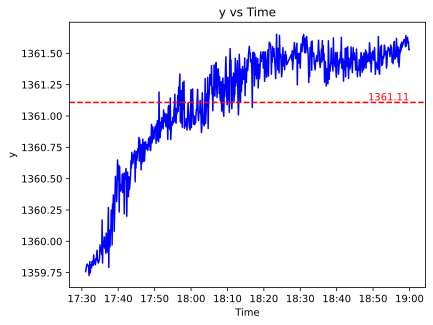

In [178]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
time_format = mdates.DateFormatter('%H:%M')

plt.plot(df.index, df['y'], 'b-')
y_mean = df['y'].mean()
plt.axhline(y=y_mean, color='r', linestyle='--', label='Mean')
plt.text(df.index[-1], y_mean, f'{y_mean:.2f}', color='r', 
                 verticalalignment='bottom', horizontalalignment='right')
plt.gca().xaxis.set_major_formatter(time_format)

# plt.gcf().autofmt_xdate()
# plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))

plt.xlabel('Time')
plt.ylabel('y')
plt.title('y vs Time')
plt.show()